In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [2]:
DF=pd.read_csv(r'E:\Things I Did\pyclasses\bodyfat.csv')

In [3]:
DF

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
...,...,...,...,...,...,...,...,...,...,...
95,20.1,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1
96,29.4,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7
97,13.0,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7
98,25.2,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4


In [4]:
# IsFat 1 if bodyfat >= 20 else 0
DF['IsFat'] = [1 if i>=20 else 0 for i in DF['Bodyfat']]
DF.drop(columns = ['Bodyfat'],inplace = True)
#DF.drop(columns = ['Age'],inplace = True)
DF

,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist,IsFat
0,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7,1
1,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2,1
2,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4,1
3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1,0
4,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7,1
...,...,...,...,...,...,...,...,...,...,...
95,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1,1
96,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7,1
97,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7,0
98,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4,1


In [5]:
X=DF.iloc[:,0:-1]
Y=DF.iloc[:,-1]
Y

0     1
1     1
2     1
3     0
4     1
     ..
95    1
96    1
97    0
98    1
99    0
Name: IsFat, Length: 100, dtype: int64

In [6]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y,test_size=0.2)


In [7]:
#model=KNeighborsClassifier(n_neighbors=2,weights='distance')
#model = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=30)
model = LinearSVC()
model.fit(Xtrain,Ytrain)

LinearSVC()

In [8]:
Ypred=model.predict(Xtest)
Ypred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

[[ 7  3]
 [ 0 10]]


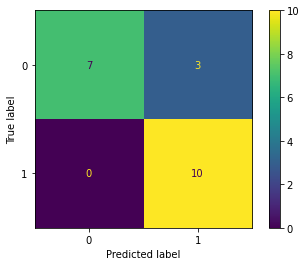

In [9]:
disp=plot_confusion_matrix(model,Xtest,Ytest)
print(disp.confusion_matrix)